In [18]:
import os
import caselawnet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import networkx as nx

In [19]:
inputpath = '/media/sf_VBox_Shared/CaseLaw/graphs/lido/'
#fn = os.path.join(inputpath, 'subnetworks', '8_extended_connected.json')
fn = os.path.join(inputpath, 'hogeraad.json')

In [20]:
with open(fn) as f:
    network = json.load(f)

In [21]:
graph = caselawnet.network_analysis.get_network(network['nodes'], network['edges'])

In [22]:
nodes_df = pd.DataFrame(network['nodes'])

In [23]:
nodes_df.to_csv(os.path.join(inputpath, 'hogeraad_network_nodes.csv'), index=False)

In [48]:
nodes_df

,abstract,articles,authorities,betweenness_centrality,closeness_centrality,community,creator,date,degree,degree_centrality,...,in_degree_centrality,out_degree,out_degree_centrality,pagerank,rel_in_degree,subject,title,x,y,year
0,Procesrecht. Hoger beroep tegen tussenvonnis m...,[Wetboek van Burgerlijke Rechtsvordering (geld...,0.000000e+00,0.000000e+00,0.000132,729,Hoge Raad der Nederlanden,2017-11-24,7,0.000102,...,0.000000,7,0.000102,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#civielR...,"ECLI:NL:HR:2017:3018 - Hoge Raad, 24-11-2017 /...",0.264610,0.630374,2017
1,Prejudiciële vraag (art. 392 Rv). Komt tijdens...,"[Faillissementswet, Artikel 133, Faillissement...",0.000000e+00,0.000000e+00,0.000029,5163,Hoge Raad der Nederlanden,2017-11-24,2,0.000029,...,0.000000,2,0.000029,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#civielR...,"ECLI:NL:HR:2017:2991 - Hoge Raad, 24-11-2017 /...",0.294650,0.807496,2017
2,IPR en arbitrage. Erkenning en tenuitvoerleggi...,"[Wet op de rechterlijke organisatie, Artikel 8...",0.000000e+00,0.000000e+00,0.000074,304,Hoge Raad der Nederlanden,2017-11-24,3,0.000044,...,0.000000,3,0.000044,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#civielR...,"ECLI:NL:HR:2017:2992 - Hoge Raad, 24-11-2017 /...",0.532515,0.419731,2017
3,Procesrecht. Aansprakelijkheidsrecht. Getuigen...,"[Wetboek van Burgerlijke Rechtsvordering, Arti...",0.000000e+00,0.000000e+00,0.000033,234,Hoge Raad der Nederlanden,2017-11-24,2,0.000029,...,0.000000,2,0.000029,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#civielR...,"ECLI:NL:HR:2017:3016 - Hoge Raad, 24-11-2017 /...",0.674323,0.320451,2017
4,Art. 8:60 Awb; art. 8:33 Awb; art. 177 Rv. Ver...,"[Wetboek van Burgerlijke Rechtsvordering, Arti...",0.000000e+00,0.000000e+00,0.000028,140,Hoge Raad der Nederlanden,2017-11-24,1,0.000015,...,0.000000,1,0.000015,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#bestuur...,"ECLI:NL:HR:2017:2986 - Hoge Raad, 24-11-2017 /...",0.718006,0.447281,2017
5,Faillissementsrecht. Verrekening vordering opd...,"[Faillissementswet, Artikel 53, Burgerlijk Wet...",0.000000e+00,0.000000e+00,0.000023,5490,Hoge Raad der Nederlanden,2017-11-24,1,0.000015,...,0.000000,1,0.000015,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#civielR...,"ECLI:NL:HR:2017:3017 - Hoge Raad, 24-11-2017 /...",0.987775,0.390626,2017
6,"Douanerechten; art. 201, lid 3, CDW; art. 246 ...","[Wet op de rechterlijke organisatie, Artikel 8...",0.000000e+00,0.000000e+00,0.000093,893,Hoge Raad der Nederlanden,2017-11-24,5,0.000073,...,0.000000,5,0.000073,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#bestuur...,"ECLI:NL:HR:2017:2980 - Hoge Raad, 24-11-2017 /...",0.729073,0.432743,2017
7,Conserverende aanslag ter zake van pensioenaan...,"[Wet inkomstenbelasting 2001, Artikel 3.81, We...",0.000000e+00,0.000000e+00,0.000047,159,Hoge Raad der Nederlanden,2017-11-24,1,0.000015,...,0.000000,1,0.000015,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#bestuur...,"ECLI:NL:HR:2017:2985 - Hoge Raad, 24-11-2017 /...",0.992209,0.430960,2017
8,HR verklaart het beroep in cassatie n-o met to...,"[Wet waardering onroerende zaken, Wet op de re...",0.000000e+00,0.000000e+00,0.000000,10220,Hoge Raad der Nederlanden,2017-11-24,0,0.000000,...,0.000000,0,0.000000,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#bestuur...,"ECLI:NL:HR:2017:2975 - Hoge Raad, 24-11-2017 /...",0.000259,0.786060,2017
9,HR: 81.1 RO.,"[Wet op de rechterlijke organisatie, Artikel 81]",0.000000e+00,0.000000e+00,0.000000,50148,Hoge Raad der Nederlanden,2017-11-24,0,0.000000,...,0.000000,0,0.000000,0.000013,0.000000,http://psi.rechtspraak.nl/rechtsgebied#bestuur...,"ECLI:NL:HR:2017:2976 - Hoge Raad, 24-11-2017 /...",0.154328,0.557109,2017


## Assortativity

In [14]:
node_id ='https://uitspraken.rechtspraak.nl/inziendocument?id=ECLI:NL:HR:2010:BM6659'
graph.node[node_id]

{'abstract': '',
 'articles': '',
 'authorities': 0.0,
 'betweenness_centrality': 0.0,
 'closeness_centrality': 0.0,
 'community': '16572',
 'creator': 'Hoge Raad der Nederlanden',
 'date': '2010-07-06',
 'degree': 0,
 'degree_centrality': 0.0,
 'ecli': 'ECLI:NL:HR:2010:BM6659',
 'hubs': 0.0,
 'in_degree': 0,
 'in_degree_centrality': 0.0,
 'out_degree': 0,
 'out_degree_centrality': 0.0,
 'pagerank': 1.2563447478953702e-05,
 'rel_in_degree': 0.0,
 'subject': 'http://psi.rechtspraak.nl/rechtsgebied#strafrecht',
 'title': 'ECLI:NL:HR:2010:BM6659 - Hoge Raad, 06-07-2010 / 08/01326',
 'x': 0.7121912266152512,
 'y': 0.47696394405146525,
 'year': 2010.0}

In [15]:
nx.attribute_assortativity_coefficient(graph, 'subject')

0.69751191942482

In [16]:
nx.attribute_assortativity_coefficient(graph, 'community')

0.9798785586666019

## Degree distributions

In [49]:
degree_hist = nx.degree_histogram(graph)

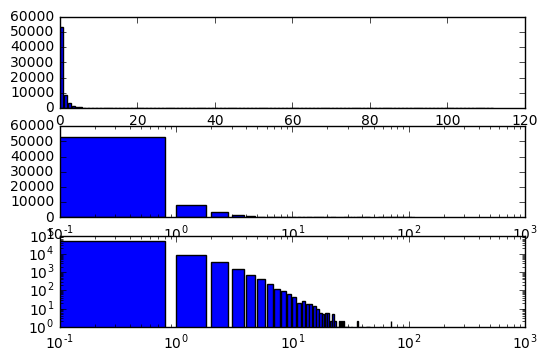

In [50]:
ax = plt.subplot(311)
ax.bar(range(len(degree_hist)), degree_hist);

ax = plt.subplot(312)
ax.bar(range(len(degree_hist)), degree_hist);
ax.set_xscale("log", nonposx='clip')


ax = plt.subplot(313)
ax.bar(range(len(degree_hist)), degree_hist);
ax.set_xscale("log")
ax.set_yscale("log")

## Connected components

In [52]:
import numpy as np

In [ ]:
ccs = list(nx.weakly_connected_components(graph))

In [57]:
ccs_multiple = [c for c in ccs if len(c) > 1]
ccs_sizes = np.array([len(c) for c in ccs])
ccs_multiple_sizes = np.array([len(c) for c in ccs_multiple])
print("Number of connected components:", len(ccs))
print("Relative size of largest component:", np.max(ccs_sizes)/np.sum(ccs_sizes))
print("Number of non-singleton components:", len(ccs_multiple_sizes))
print("Relative size of largest component without singletons:", np.max(ccs_multiple_sizes)/np.sum(ccs_multiple_sizes))

Number of connected components: 55195
Relative size of largest component: 0.124698169259
Number of non-singleton components: 2001
Relative size of largest component without singletons: 0.562850914856


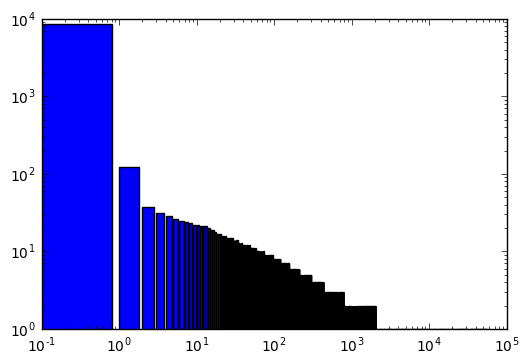

In [58]:
plt.bar(range(len(ccs)), sorted(ccs_sizes, reverse=True))
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

## communities

In [59]:
community_sizes = nodes_df.groupby('community').count()['id']
print("Number of communities:", len(community_sizes))
print("Average size of community", community_sizes.mean())

Number of communities: 55259
Average size of community 1.23661304041
